In [24]:
import requests
import os
import pandas as pd
from IPython.core.display import HTML
import json
from cred import credentials

In [25]:
population_germany = pd.read_csv('data/r_population.csv', skiprows=5, skipfooter=4, delimiter=';')
house_price_germany = pd.read_csv('data/BBQFS.A.DE.0000.HOUS_PRC_LTS._X.0000.csv', skiprows=8, delimiter=',')


/var/folders/_k/3v2l6rmd5m3gnk2prt6lj__h0000gn/T/ipykernel_22009/2057232760.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  population_germany = pd.read_csv('data/r_population.csv', skiprows=5, skipfooter=4, delimiter=';')


In [26]:
house_price_germany.columns = ['year', 'price', 'unnamed']
house_price_germany = house_price_germany[['year', 'price']]


In [37]:
house_price_germany

,year,price
0,1991,91.3
1,1992,96.0
2,1993,100.1
3,1994,103.9
4,1995,104.9
5,1996,103.5
6,1997,101.7
7,1998,100.7
8,1999,100.8
9,2000,101.4


In [27]:
population_germany

,Unnamed: 0,number
0,1950-12-31,50958125
1,1951-12-31,51434777
2,1952-12-31,51863761
3,1953-12-31,52453806
4,1954-12-31,52943295
...,...,...
66,2016-12-31,82521653
67,2017-12-31,82792351
68,2018-12-31,83019213
69,2019-12-31,83166711


In [28]:
population_germany.columns = ['date', 'population']

In [29]:
population_germany['date'] = pd.to_datetime(population_germany['date'])
population_germany['year'] = pd.DatetimeIndex(population_germany['date']).year
# df['month'] = pd.DatetimeIndex(df['date']).month

In [36]:
result = pd.merge(population_germany, house_price_germany, on = 'year')
result

,date,population,year,price
0,1991-12-31,80274564,1991,91.3
1,1992-12-31,80974632,1992,96.0
2,1993-12-31,81338093,1993,100.1
3,1994-12-31,81538603,1994,103.9
4,1995-12-31,81817499,1995,104.9
5,1996-12-31,82012162,1996,103.5
6,1997-12-31,82057379,1997,101.7
7,1998-12-31,82037011,1998,100.7
8,1999-12-31,82163475,1999,100.8
9,2000-12-31,82259540,2000,101.4


In [35]:
result.corr()

,population,year,price
population,1.000000,0.120153,0.229906
year,0.120153,1.000000,0.639521
price,0.229906,0.639521,1.000000


<AxesSubplot:xlabel='population', ylabel='price'>

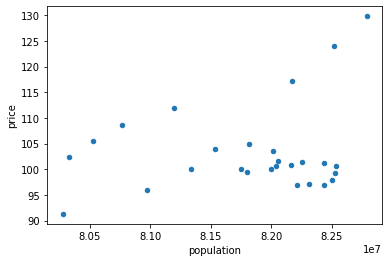

In [57]:
result.plot(kind='scatter', x= 'population', y = 'price')

In [41]:
price_index_2016_2021 = pd.read_csv('data/property-price-indices-district-types/rppi_district_types_quarters-Table 1.csv', skiprows=5, skipfooter=30, delimiter=';', header=1)
price_index_2016_2021

/var/folders/_k/3v2l6rmd5m3gnk2prt6lj__h0000gn/T/ipykernel_22009/2160701618.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  price_index_2016_2021 = pd.read_csv('data/property-price-indices-district-types/rppi_district_types_quarters-Table 1.csv', skiprows=5, skipfooter=30, delimiter=';', header=1)


,Unnamed: 0,Unnamed: 1,Metropolises 2),Cities not attached \nto a district 3),Urban districts,Densely populated \nrural districts,Sparsely populated \nrural districts,Metropolises 2).1,Cities not attached \nto a district 3).1,Urban districts.1,Densely populated \nrural districts.1,Sparsely populated \nrural districts.1,Unnamed: 12
0,2016.0,Q1,"104,0","101,7","102,8","103,3","104,6","104,6","100,5","102,0","101,2","102,3",NaN
1,NaN,Q2,"107,6","103,9","104,3","106,5","109,2","109,3","102,4","104,0","105,5","106,2",NaN
2,NaN,Q3,"112,1","106,4","106,2","105,7","108,6","110,2","105,2","105,7","105,3","107,7",NaN
3,NaN,Q4,"114,7","108,5","107,4","109,4","108,9","112,8","106,5","106,6","108,4","107,8",NaN
4,2017.0,Q1,"117,3","108,2","108,8","113,5","107,4","114,7","103,6","107,0","108,8","110,1",NaN
5,NaN,Q2,"121,2","112,0","110,0","114,2","111,4","117,4","107,4","108,8","108,3","113,0",NaN
6,NaN,Q3,"124,4","115,0","111,5","114,0","112,3","121,1","109,2","111,8","110,9","112,5",NaN
7,NaN,Q4,"127,7","114,6","113,2","119,5","117,7","125,5","110,5","112,2","115,3","115,8",NaN
8,2018.0,Q1,"129,6","117,3","115,2","117,1","115,0","127,6","111,9","112,0","115,0","116,2",NaN
9,NaN,Q2,"134,5","118,2","116,1","120,1","115,8","129,4","112,9","113,7","117,7","120,1",NaN


In [42]:
price_index_2016_2021.columns = ['year', 'quarter', 'metropolises_flat', 'cities_not_district3_flat', 'urban_districts_flat', 'densely_populated_rural_districts_flat', 'sparsely_populated_rural_districts_flat',
'metropolises_house', 'cities_not_district3_house', 'urban_districts_house', 'densely_populated_rural_districts_house', 'sparsely_populated_rural_districts_house', 'unnamed']

In [54]:

price_index_2016_2021.year = [item for sublist in [[i] * 4 for i in range(2016, 2022)] for item in sublist]
price_index_2016_2021

,year,quarter,metropolises_flat,cities_not_district3_flat,urban_districts_flat,densely_populated_rural_districts_flat,sparsely_populated_rural_districts_flat,metropolises_house,cities_not_district3_house,urban_districts_house,densely_populated_rural_districts_house,sparsely_populated_rural_districts_house,unnamed
0,2016,Q1,"104,0","101,7","102,8","103,3","104,6","104,6","100,5","102,0","101,2","102,3",NaN
1,2016,Q2,"107,6","103,9","104,3","106,5","109,2","109,3","102,4","104,0","105,5","106,2",NaN
2,2016,Q3,"112,1","106,4","106,2","105,7","108,6","110,2","105,2","105,7","105,3","107,7",NaN
3,2016,Q4,"114,7","108,5","107,4","109,4","108,9","112,8","106,5","106,6","108,4","107,8",NaN
4,2017,Q1,"117,3","108,2","108,8","113,5","107,4","114,7","103,6","107,0","108,8","110,1",NaN
5,2017,Q2,"121,2","112,0","110,0","114,2","111,4","117,4","107,4","108,8","108,3","113,0",NaN
6,2017,Q3,"124,4","115,0","111,5","114,0","112,3","121,1","109,2","111,8","110,9","112,5",NaN
7,2017,Q4,"127,7","114,6","113,2","119,5","117,7","125,5","110,5","112,2","115,3","115,8",NaN
8,2018,Q1,"129,6","117,3","115,2","117,1","115,0","127,6","111,9","112,0","115,0","116,2",NaN
9,2018,Q2,"134,5","118,2","116,1","120,1","115,8","129,4","112,9","113,7","117,7","120,1",NaN


In [61]:
for col in price_index_2016_2021.columns.to_list()[2:-1]:
    price_index_2016_2021[col] = price_index_2016_2021[col].map(lambda x: float(x.replace(',','.')))


In [72]:
price_group_year = price_index_2016_2021.groupby('year').mean()
price_group_year

,metropolises_flat,cities_not_district3_flat,urban_districts_flat,densely_populated_rural_districts_flat,sparsely_populated_rural_districts_flat,metropolises_house,cities_not_district3_house,urban_districts_house,densely_populated_rural_districts_house,sparsely_populated_rural_districts_house,unnamed
year,,,,,,,,,,,
2016,109.600,105.125,105.175,106.225,107.825,109.225,103.650,104.575,105.100,106.000,NaN
2017,122.650,112.450,110.875,115.300,112.200,119.675,107.675,109.950,110.825,112.850,NaN
2018,135.200,120.550,116.900,121.100,119.050,130.775,113.975,114.975,118.800,120.075,NaN
2019,145.875,128.125,123.650,127.650,125.275,140.725,121.275,121.875,123.975,127.750,NaN
2020,156.950,139.975,131.050,137.725,136.050,153.425,129.100,130.550,136.050,139.400,NaN
2021,176.975,154.625,143.975,152.050,151.200,173.400,142.775,144.075,151.600,158.550,NaN


In [76]:
price_group_year.reset_index(inplace=True)
price_group_year

,index,year,metropolises_flat,cities_not_district3_flat,urban_districts_flat,densely_populated_rural_districts_flat,sparsely_populated_rural_districts_flat,metropolises_house,cities_not_district3_house,urban_districts_house,densely_populated_rural_districts_house,sparsely_populated_rural_districts_house,unnamed
0,0,2016,109.600,105.125,105.175,106.225,107.825,109.225,103.650,104.575,105.100,106.000,NaN
1,1,2017,122.650,112.450,110.875,115.300,112.200,119.675,107.675,109.950,110.825,112.850,NaN
2,2,2018,135.200,120.550,116.900,121.100,119.050,130.775,113.975,114.975,118.800,120.075,NaN
3,3,2019,145.875,128.125,123.650,127.650,125.275,140.725,121.275,121.875,123.975,127.750,NaN
4,4,2020,156.950,139.975,131.050,137.725,136.050,153.425,129.100,130.550,136.050,139.400,NaN
5,5,2021,176.975,154.625,143.975,152.050,151.200,173.400,142.775,144.075,151.600,158.550,NaN


In [84]:
import numpy as np
cols = price_group_year.columns.to_list()[2:-2]
price_group_year['avg'] = [np.mean(price_group_year[cols].iloc[i].values) for i in range(6)]
price_group_year

,index,year,metropolises_flat,cities_not_district3_flat,urban_districts_flat,densely_populated_rural_districts_flat,sparsely_populated_rural_districts_flat,metropolises_house,cities_not_district3_house,urban_districts_house,densely_populated_rural_districts_house,sparsely_populated_rural_districts_house,unnamed,avg
0,0,2016,109.600,105.125,105.175,106.225,107.825,109.225,103.650,104.575,105.100,106.000,NaN,106.2500
1,1,2017,122.650,112.450,110.875,115.300,112.200,119.675,107.675,109.950,110.825,112.850,NaN,113.4450
2,2,2018,135.200,120.550,116.900,121.100,119.050,130.775,113.975,114.975,118.800,120.075,NaN,121.1400
3,3,2019,145.875,128.125,123.650,127.650,125.275,140.725,121.275,121.875,123.975,127.750,NaN,128.6175
4,4,2020,156.950,139.975,131.050,137.725,136.050,153.425,129.100,130.550,136.050,139.400,NaN,139.0275
5,5,2021,176.975,154.625,143.975,152.050,151.200,173.400,142.775,144.075,151.600,158.550,NaN,154.9225


In [97]:
c = 124.1/106.25
price_group_year['price'] = price_group_year.avg * c
price_group_year

,index,year,metropolises_flat,cities_not_district3_flat,urban_districts_flat,densely_populated_rural_districts_flat,sparsely_populated_rural_districts_flat,metropolises_house,cities_not_district3_house,urban_districts_house,densely_populated_rural_districts_house,sparsely_populated_rural_districts_house,unnamed,avg,avg_w,price
0,0,2016,109.600,105.125,105.175,106.225,107.825,109.225,103.650,104.575,105.100,106.000,NaN,106.2500,124.10000,124.10000
1,1,2017,122.650,112.450,110.875,115.300,112.200,119.675,107.675,109.950,110.825,112.850,NaN,113.4450,132.50376,132.50376
2,2,2018,135.200,120.550,116.900,121.100,119.050,130.775,113.975,114.975,118.800,120.075,NaN,121.1400,141.49152,141.49152
3,3,2019,145.875,128.125,123.650,127.650,125.275,140.725,121.275,121.875,123.975,127.750,NaN,128.6175,150.22524,150.22524
4,4,2020,156.950,139.975,131.050,137.725,136.050,153.425,129.100,130.550,136.050,139.400,NaN,139.0275,162.38412,162.38412
5,5,2021,176.975,154.625,143.975,152.050,151.200,173.400,142.775,144.075,151.600,158.550,NaN,154.9225,180.94948,180.94948


In [111]:
result_2016_2021 = price_group_year[['year', 'price']]
result_2016_2021

,year,price
0,2016,124.10000
1,2017,132.50376
2,2018,141.49152
3,2019,150.22524
4,2020,162.38412
5,2021,180.94948


In [114]:
result_price_2017_2021 = result_2016_2021.iloc[2:6]

In [115]:
result2 = pd.concat([house_price_germany, result_price_2017_2021])
result2


,year,price
0,1991,91.30000
1,1992,96.00000
2,1993,100.10000
3,1994,103.90000
4,1995,104.90000
5,1996,103.50000
6,1997,101.70000
7,1998,100.70000
8,1999,100.80000
9,2000,101.40000


In [117]:
result3 = pd.merge(result2, population_germany, on = 'year')

In [118]:
result3.corr()

,year,price,population
year,1.000000,0.713916,0.348667
price,0.713916,1.000000,0.529003
population,0.348667,0.529003,1.000000


<AxesSubplot:xlabel='population', ylabel='price'>

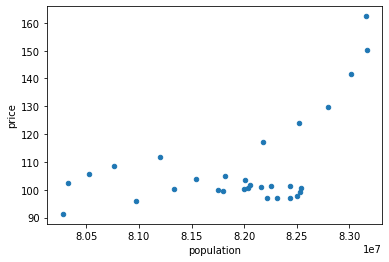

In [119]:
result3.plot(kind= 'scatter', x='population', y='price')